In [1]:
import pandas as pd


In [98]:
year_range = range(2017,2020)
master_data = pd.DataFrame()

for year in year_range:
    data = pd.read_csv('Alice_Springs_'+str(year)+'.csv')
    print('Extracting '+str(year))
    data = proccess_annual_data(data)
    master_data = master_data.append(data, sort=False)
 

Extracting 2017
Extracting 2018
Extracting 2019


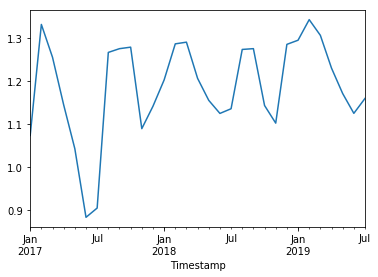

In [110]:
master_data['14'].resample('M').mean().plot()


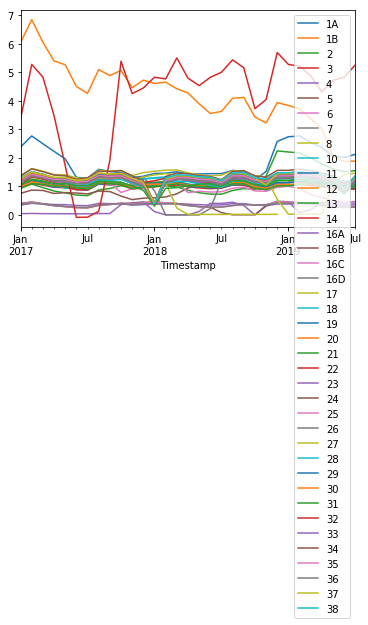

In [105]:
master_data.resample('M').mean().plot()


In [97]:
def proccess_annual_data(data):
    
    data.index=pd.to_datetime(data.Timestamp)
    cols = list(data.columns)
    power_cols = [s for s in cols if 'Active Power' in s and s[0].isdigit()]
    new_power_cols = [s.split(' ')[0] for s in power_cols]
    power_data = data[power_cols].fillna('0')
    power_data.columns = new_power_cols
    power_data=power_data.astype(float)
    
    return power_data

In [84]:
power_data = proccess_annual_data(data)




In [ ]:
result = df1.append(df4, sort=False)

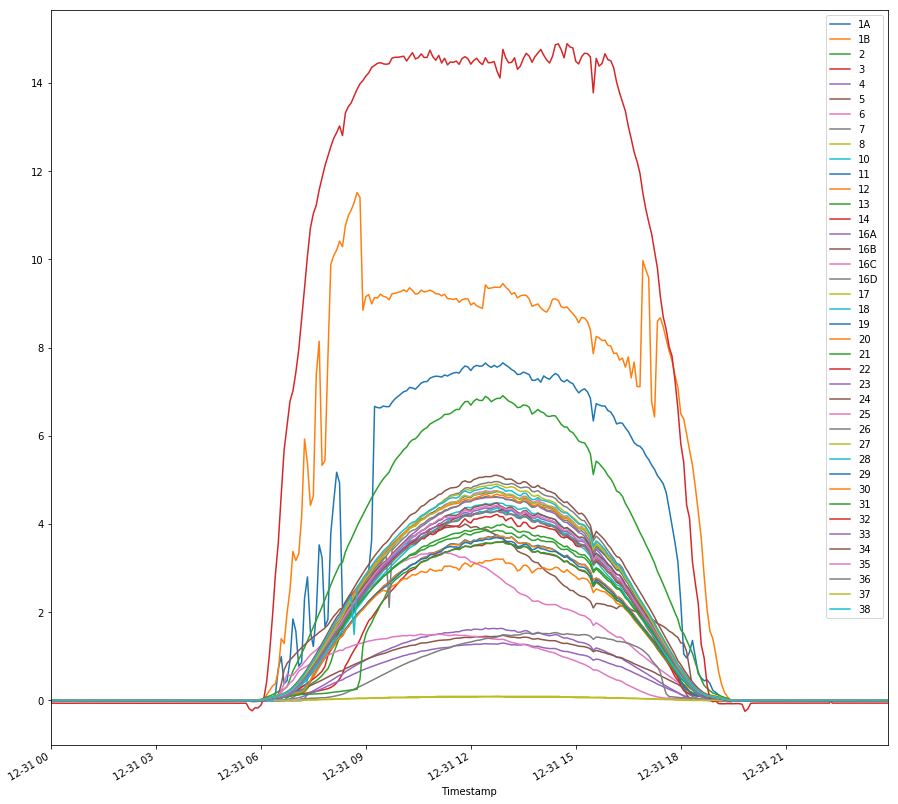

In [85]:
power_data['2018-12-31'].plot(figsize=(15,15))

In [45]:
panel_meta_data = pd.read_csv('panel_meta_data.csv',index_col=0)

In [46]:
panel_meta_data

,Manufacturer,Array Rating,PV Technology,Array Structure,Installed,Panel Rating,Number Of Panels,Panel Type,Array Area,Type Of Tracker,Inverter Size / Type,Installation Completed,Array Tilt/Azimuth
1A,Trina,10.5kW,mono-Si,Tracker: Dual Axis,2009,175W,2 x 30,Trina TSM-175DC01,2 x 38.37 m²,"DEGERenergie 5000NT, dual axis","2 x 6 kW, SMA SMC 6000A","Thu, 8 Jan 2009",Variable. Dual axis tracking.
1B,Trina,23.4kW,mono-Si,Tracker: Dual Axis,2009,195W,4 x 30,Trina TSM-195DC01A,4 x 38.37 m²,"DEGERenergie 5000NT, dual axis","4 x 6 kW, SMA SMC 6000A","Thu, 8 Jan 2009",Variable: Dual axis tracking.
2,eco-Kinetics,26.52kW,mono-Si,Tracker: Dual Axis,2010,170W,156,eco-Kinetics ECOKES 170M,199.16 m²,"ADES 5F-27M, dual axis","3 x 9 kW, SMA SMC 9000TL-10","Mon, 23 Aug 2010",Fixed. Tilt = 20' Azimuth = 0'
3,BP Solar,4.95kW,poly-Si,Fixed: Ground Mount,2008,165W,30,BP 3165,37.75 m²,NaN,"6 kW, SMA SMC 6000A","Tue, 11 Nov 2008","Tilt = 20, Azi = 0 (Solar North)"
4,Kyocera,2.16kW,poly-Si,Tracker: Dual Axis,2008,135W,2 x 8,Kyocera KD135GX-LP,2 x 8.02 m²,Portasol dual axis,"2.5 kW, SMA SB 2500","Tue, 30 Sep 2008",NaN
5,Kyocera,5.4kW,poly-Si,Tracker: Single Axis,2008,135W,5 x 8,Kyocera KD135GX-LP,5 x 8.02 m²,BW Solar F2 5 Star Tracker,"5kW, SMA SMC 5000A","Tue, 30 Sep 2008",NaN
6,Kyocera,5.4kW,poly-Si,Tracker: Dual Axis,2008,135W,5 x 8,Kyocera KD135GX-LP,5 x 8.02 m²,Wattsun AZ-125 Tracker,"5 kW, SMA SMC 5000A","Sun, 30 Nov 2008",NaN
7,First Solar,6.96kW,CdTe,Fixed: Ground Mount,2008,73W,96,First Solar FS-272*,69.12 m²,NaN,"6 kW, Fronius Primo 6.0-1","Mon, 3 Nov 2008","Tilt = 20, Azi = 0 (Solar North)"
8,Kaneka,6kW,Other,Fixed: Ground Mount,2008,60W,100,Kaneka G-EA060,95.04 m²,NaN,"6 kW, SMA SMC 6000A","Tue, 11 Nov 2008","Tilt = 20, Azi = 0 (Solar North)"
9A,Solibro,5.2kW,CIGS,Fixed: Ground Mount,2017,130W,40,Solibro Hanergy SL2-130 G2.2,37.58m2,NaN,SMA SMC 6000A,"Fri, 20 Oct 2017",20 degrees


In [62]:
tracker_mask = panel_meta_data['Array Structure'].str.contains('Tracker')
fixed_mask = panel_meta_data['Array Structure'].str.contains('Fixed')

In [63]:
trackers = panel_meta_data[tracker_mask].index.values
fixed = panel_meta_data[fixed_mask].index.values

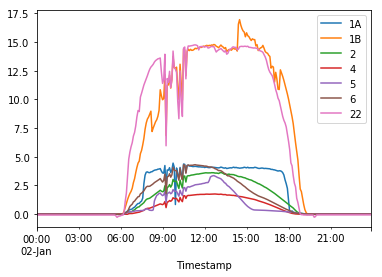

In [77]:
power_data.loc['2018-01-02',trackers].plot()

/Users/garethwalker/anaconda3/envs/DataChallenge/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


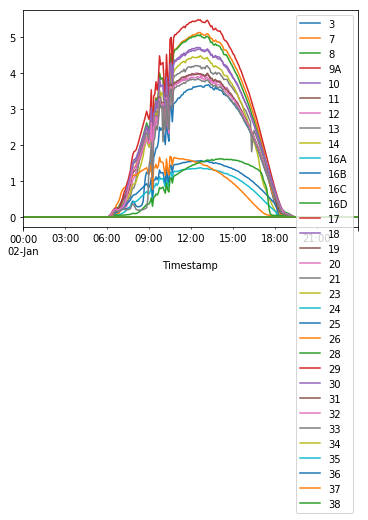

In [78]:
power_data.loc['2018-01-02',fixed].plot()

In [65]:
fixed

array(['3', '7', '8', '9A', '10', '11', '12', '13', '14', '16A', '16B',
       '16C', '16D', '17', '18', '19', '20', '21', '23', '24', '25', '26',
       '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38'],
      dtype=object)

In [79]:
power_data.columns

Index(['1A', '1B', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13',
       '14', '16A', '16B', '16C', '16D', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38'],
      dtype='object')

In [80]:
set(fixed)-set(power_data.columns)

{'9A'}